<a href="https://colab.research.google.com/github/shruthivenky/Irisdataset-task1/blob/main/Task1_irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lets Grow More**
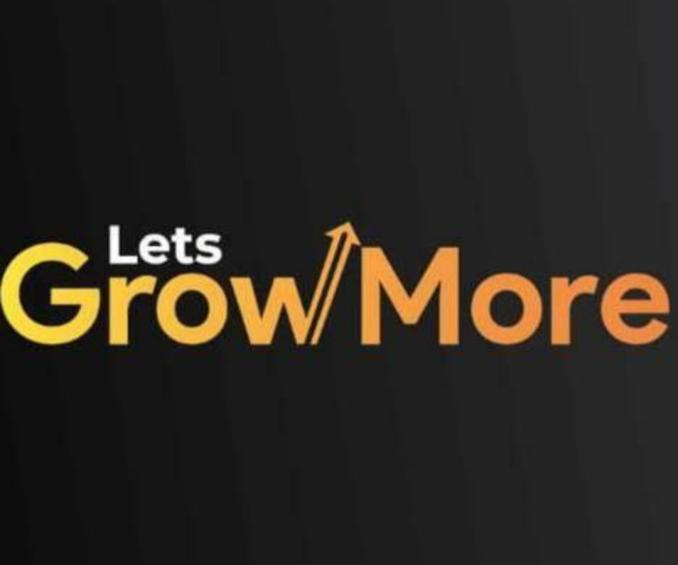

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

##Import libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


##Load dataset and view few samples of the data

In [2]:
df=pd.read_csv('/content/iris (2).csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##View data description

In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##View data structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##Count the number of samples of each class

In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

##Check for the presence of missing values

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##Plot histograms for each attribute to visualize the data

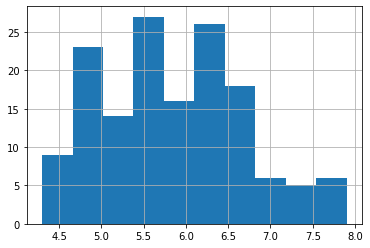

In [7]:
df['SepalLengthCm'].hist()

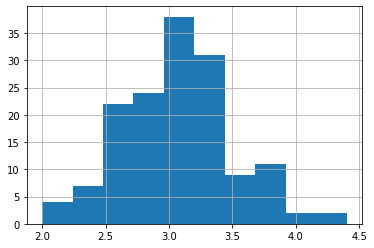

In [8]:
df['SepalWidthCm'].hist()

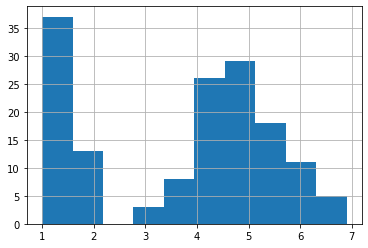

In [9]:
df['PetalLengthCm'].hist()

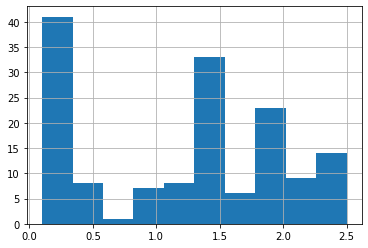

In [10]:
df['PetalWidthCm'].hist()

##Plot scatter plot on the data

In [11]:
colours=['red','orange','blue']
species=['Iris-versicolor','Iris-virginica' ,'Iris-setosa' ]

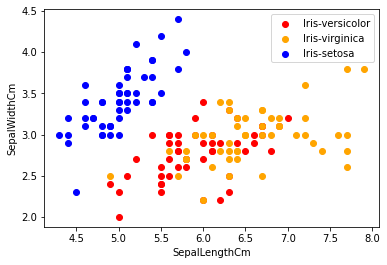

In [12]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = colours[i],label=species[i])
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")
    plt.legend()

##Find the data corelation value and visualize it

In [13]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


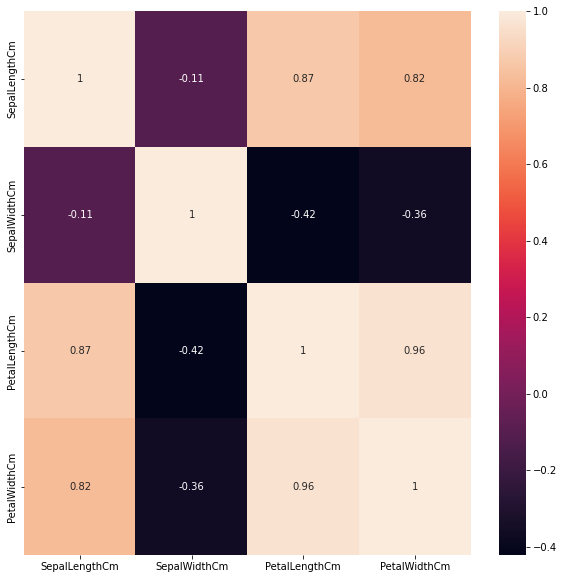

In [14]:
corr=df.corr()
fig,ax =plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)

##Import Library to encode class label (Categorical value) to Numerical value and encode attribute "Species" to numerical value


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##Import library to split the data into train and test data

In [16]:
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

##Use logistic regression approach to fit the data and check accuracy value

In [17]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()




In [18]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print("Accuracy:",model.score(x_test, y_test)*100)

Accuracy: 93.33333333333333


## Use K-NearestNeighbor Approach to fit the data and check the accuracy value


In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=None,n_neighbors=5,p=2,weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
print("Accuracy: ",model.score(x_test,y_test)* 100)

Accuracy:  93.33333333333333


## Use Decision-tree Approach to fit the data and check the accuracy value

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [24]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
print("Accuracy: ",model.score(x_test,y_test)* 100)

Accuracy:  93.33333333333333


##Since we have obtained an accuracy value of 93.3% using logistic regression and Decision tree classifier already and it is also not a very good approach to train our model for 100% accuracy as it will susceptible to outliers. So we can stop training our model further.